## Вариант 4

# Численное решение задачи Коши

Необходимые библиотеки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Найдем порядок метода. Для этого рассмотрим условия порядка:

0) Упрощающие условия:

$a_{11} + a_{12} = c_1$, $\dfrac{1}{4} = \dfrac{1}{4}$ - верно.

$a_{21} + a_{22} = c_2$, $\dfrac{1}{4} + \dfrac{1}{2} = \dfrac{3}{4}$ - верно.

1) Первый порядок:

$b_1 + b_2 = 1$, $\dfrac{1}{2} + \dfrac{1}{2} = 1$ - верно.

2) Второй порядок: 

$b_1c_1 + b_2c_2 = \dfrac{1}{2}$ 

$\dfrac{1}{2} \cdot \dfrac{1}{4} + \dfrac{1}{2} \cdot \dfrac{3}{4} = \dfrac{1}{2}$ - верно.

3) Третий порядок:

3.а) $b_1c_1^2 + b_2 c_2^2 = \dfrac{1}{3}$

$\dfrac{1}{2} \cdot \dfrac{1}{16} + \dfrac{1}{2} \cdot \dfrac{9}{16} = \dfrac{5}{16} \neq \dfrac{1}{3}$ - уже не выполнено.

3.б) $b_1a_{11}c_1 + b_1a_{12}c_2 + b_2a_{21}c_1 + b_2a_{22}c_2 = \dfrac{1}{6}$

$\dfrac{1}{2} \cdot \dfrac{1}{4} \cdot \dfrac{1}{4} + \dfrac{1}{2} \cdot \dfrac{1}{2} \cdot \dfrac{1}{4} + \dfrac{1}{2} \cdot \dfrac{1}{4} \cdot \dfrac{3}{4} = \dfrac{3}{16} \neq \dfrac{1}{6}$ - тоже не выполнено (хотя хватило бы и предыдущего подпункта).

$ $

Итак, это метод второго порядка.

In [2]:
# коэффициенты
a11 = 1/4
c1 = 1/4
c2 = 3/4 
a21 = 1/2
a22 = 1/4
b1 = 1/2
b2 = 1/2

In [3]:
# метод Ньютона, для поиска коэффициентов k_i
def find_newton(x0, g, jak, eps):
    x = x0
    x_prev = x0 + 2 * eps
    while (abs(x - x_prev) > eps):
        x_prev = x
        x = x - g(x)/jak(x)
    return x

In [4]:
def count_k_12(f, U_n, t_n, h, eps, jak):
    #k_1 = f(t_n + c_1 * h, U_n + a11 * k_1 + a12 * k_2), a12 = 0
    
    def f_1(k):
        res = f(t_n + c1 * h, U_n + a11 * k) - k    
        return res 
    #k_1 = f(t_n + c_1 * h, U_n + a11 * k_1)   
    
    def jak_1(k):
        res = jak(t_n + c1 * h, U_n + a11 * k) - 1
        return res
        
    k_1 = find_newton(0, f_1, jak_1, eps)
    
    def f_2(k):
        res = f(t_n + c2 * h, U_n + h * a21 * k_1 + a22 * k) - k
        return res
    #k_2 = f(t_n + c_2 * h, U_n + h * a21 * k_1 + a22 * k_2)
    
    def jak_2(k):
        res = jak(t_n + c2 * h, U_n + h * a21 * k_1 + a22 * k) - 1
        return res

    k_2 = find_newton(0, f_2, jak_2, eps)
    
    return k_1, k_2

In [5]:
def solve_runge_kutta(f, T, u0, jak, n, eps):
    # T - правая граница отрезка
    # u0 - вектор начального условия
    # f = f(t, u) - функция
    # jak - функция для вычисления якобиана
    # n - количество шагов интегрирования
    # eps - точность для критерия остановки итераций по нелинейности
    
    h = T / (n+1)
    U_n = u0
    
    xes = np.zeros(n+1)
    Us = np.zeros(n+1)
    xes[0] = 0
    Us[0] = u0
    
    for i in range(0, n+1):
        t_n = h * i
        k_1, k_2 = count_k_12(f, U_n, t_n, h, eps, jak)
        
        xes[i] = t_n
        Us[i] = U_n 
        
        U_n = U_n + h * (b1 * k_1 + b2 * k_2)
    
    return xes, Us

### Тестовая задача 1

Рассмотрим простую функцию: $u(t) = t^2$.

In [35]:
# f = u'(t)
def func_1(t, u):
    return 2 * t

# delta(f)/delta(u)
def f_u(t, u):
    return 0

In [36]:
xes, us = solve_runge_kutta(func_1, 3, 0, f_u, 5, 1e-6)
print('Точки: ', xes)
print('Решения в них', us)

Точки:  [0.  0.5 1.  1.5 2.  2.5]
Решения в них [0.   0.25 1.   2.25 4.   6.25]


Получилось очень точно.

Рассмотрим бОльшее число точек и построим графики.

In [37]:
xx, uu = solve_runge_kutta(func_1, 10, 0, f_u, 1000, 1e-5)

In [38]:
# сама функция
def u_1(t):
    return t * t

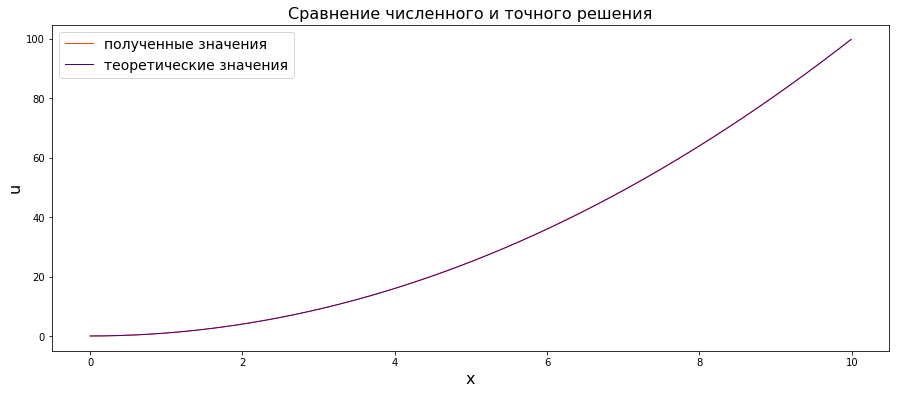

In [39]:
fig = plt.figure(figsize=(15, 6))
plt.plot(xx, uu, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.plot(xx, u_1(xx), color = 'indigo', label = "теоретические значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.title("Сравнение численного и точного решения", fontsize=16)
plt.legend(fontsize=14)
plt.show()

Как можно заметить, решения практически совпадают.

### Тестовая задача 2

Рассмотрим задачу посложнее. $u(t) = t \cdot ln(t+1) + e^{t^2}$.

In [40]:
def u_2(t):
    res = t * np.log(t+1) + np.exp(t ** 2)
    return res

def func_2(t, u):
    res = t/(t+1) + np.log(t+1) + 2 * t * np.exp(t ** 2)
    return res

def f_u_2(t, u):
    return 0

In [41]:
xes, us = solve_runge_kutta(func_2, 3, 1, f_u_2, 5, 1e-8)
print('Точки: ', xes)
print('Решения в них', us)
print('Точные решения', u_2(xes))

Точки:  [0.  0.5 1.  1.5 2.  2.5]
Решения в них [  1.           1.4843142    3.37828173  10.60796061  54.35853104
 486.88871924]
Точные решения [  1.           1.48675797   3.41142901  10.86217193  56.79537461
 521.14473209]


График:

In [42]:
xx2, uu2 = solve_runge_kutta(func_2, 3, 1, f_u_2, 30, 1e-5)

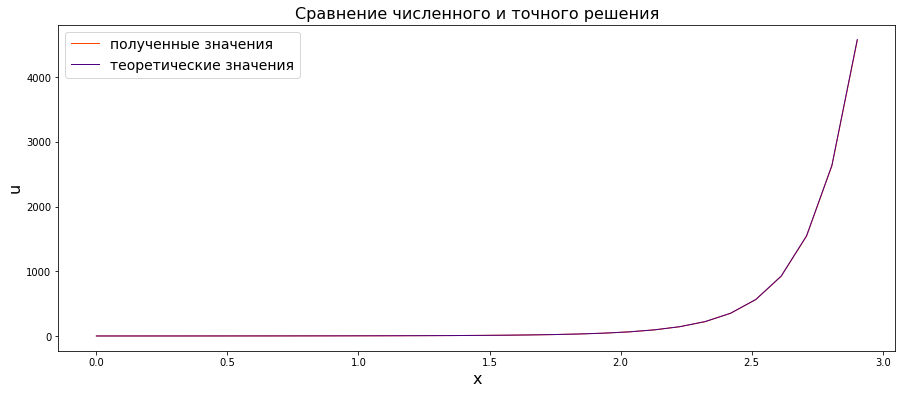

In [43]:
fig = plt.figure(figsize=(15, 6))
plt.plot(xx2, uu2, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.plot(xx2, u_2(xx2), color = 'indigo', label = "теоретические значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.title("Сравнение численного и точного решения", fontsize=16)
plt.legend(fontsize=14)
plt.show()

И снова, практически совпадают.

### Тестовая задача 3

In [44]:
def u_3(t):
    res = np.sin(t+1) + 5 * t - np.log(t+1)
    return res

def func_3(t, u):
    res = np.cos(t+1) + 5 - 1/(t+1)
    return res

def f_u_3(t, u):
    return 0

In [45]:
xes, us = solve_runge_kutta(func_3, 5, np.sin(1), f_u_3, 12, 1e-2)
print('Точки: ', xes)
print('Решения в них', us)
print('Точные решения', u_3(xes))

Точки:  [0.         0.38461538 0.76923077 1.15384615 1.53846154 1.92307692
 2.30769231 2.69230769 3.07692308 3.46153846 3.84615385 4.23076923
 4.61538462]
Решения в них [ 0.84147098  2.58132082  4.25723954  5.83795213  7.32884261  8.75991599
 10.17671112 11.63130301 13.17337654 14.8421584  16.66015574 18.62950181
 20.73138134]
Точные решения [ 0.84147098  2.58037286  4.25598539  5.836763    7.32797341  8.7595287
 10.17687383 11.63199012 13.17447758 14.84349701 16.66151705 18.63066494
 20.73215237]


Графики:

In [33]:
xx3, uu3 = solve_runge_kutta(func_3, 10, np.sin(1), f_u_3, 40, 1e-2)

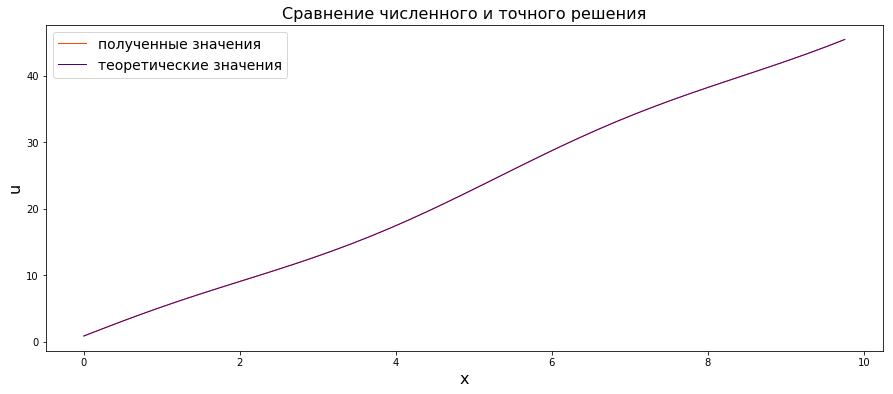

In [46]:
fig = plt.figure(figsize=(15, 6))
plt.plot(xx3, uu3, color = 'orangered', label = "полученные значения", linewidth = 1)
plt.plot(xx3, u_3(xx3), color = 'indigo', label = "теоретические значения", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.title("Сравнение численного и точного решения", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [65]:
def findMaxError(nodes, numerical, theoretical):
    eps = 0
    for i in range(len(nodes)-1):
        if (abs(numerical[i] - theoretical[i]) > eps):
            eps = abs(numerical[i] - theoretical[i])
    return eps

In [68]:
# последовательность вложенных сеток
# n = число разбиений (отрезков)
eps = 1
n = 2
epses = []
iters = 0

while (eps >= 1e-20 and iters <= 22):
    xes3, us3 = solve_runge_kutta(func_3, 10, np.sin(1), f_u_3, n, 1e-3)
    u_theor = u_3(xes3)
    eps = findMaxError(xes3, us3, u_theor)
    epses.append(eps)
    n *= 2
    iters += 1 # just another stop criterion

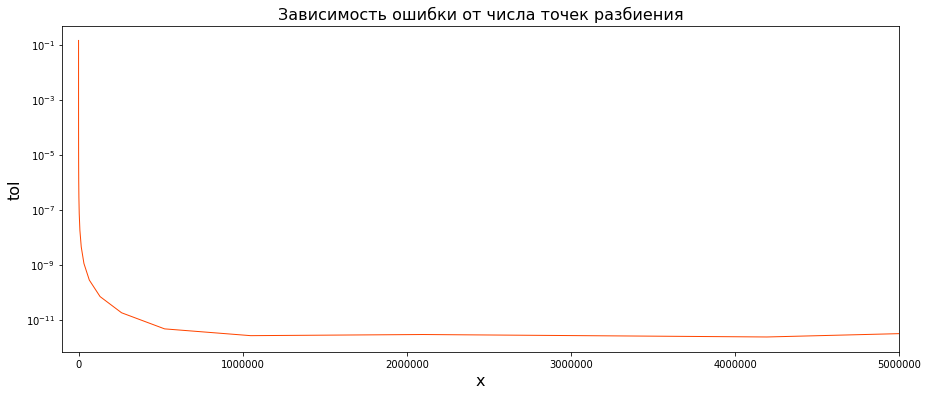

In [105]:
ns = 2 ** (np.arange(1, 24))

fig = plt.figure(figsize=(15, 6))
axx = fig.add_subplot(111)
plt.plot(ns, epses, color = 'orangered', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('tol', fontsize=16)
plt.title("Зависимость ошибки от числа точек разбиения", fontsize=16)
plt.xlim(-1e5, 0.5e7)
axx.set_yscale('log')
plt.show()

Порядок:

In [107]:
eps = 1
n = 2
epses = []
iters = 0
eps_prev = 1

while (eps >= 1e-20 and iters <= 12):
    xes3, us3 = solve_runge_kutta(func_3, 10, np.sin(1), f_u_3, n, 1e-3)
    u_theor = u_3(xes3)
    eps_prev = eps
    eps = findMaxError(xes3, us3, u_theor)
    epses.append(eps)
    n *= 2
    iters += 1 # just another stop criterion
    print('n = ', n, ' p = ', np.log(eps_prev/eps))

n =  4  p =  1.9535322635632084
n =  8  p =  1.2063932038438392
n =  16  p =  1.1184743497847769
n =  32  p =  1.2445831951400919
n =  64  p =  1.3050208305502609
n =  128  p =  1.3496154743357307
n =  256  p =  1.3689217650462822
n =  512  p =  1.3778214450761674
n =  1024  p =  1.3823200341077024
n =  2048  p =  1.384328184198715
n =  4096  p =  1.3853161934401497
n =  8192  p =  1.3858049624216038
n =  16384  p =  1.3860484238194335
